In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#lecture des fichiers csv
train = pd.read_csv("fairface_label_train.csv")
val = pd.read_csv("fairface_label_val.csv")

In [3]:
train.head()

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [4]:
#extraction de la colonne contenant les âges
train_age = train['age']
val_age = val['age']

#on créer un tableau avec les ages(ocurrence unique des ages)
dic_ages = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','more than 70']
print("liste des occurences uniques des ages :\n",dic_ages,type(dic_ages))

#conversion de train_age et val_age en tableau
train_age = list(train_age)
val_age = list(val_age)
print("5 premieres tranches d'age de train:",train_age[0:5])
print("5 premieres tranches d'age de val:",val_age[0:5])

def age_to_label(dic,list_age) : 
    #dic : dictionnaire de tranche d'age ocurrence unique
    #list_age : tableau qui contient une liste de tranche d'age
    #return : un tableau d'int qui contient l'indice de l'élement i de list_age dans dic.
    label = np.array([],dtype=int)
    for ages in list_age :
        index = dic.index(ages,0,len(dic))
        label = np.append(label,index)
    return label

ytrain = age_to_label(dic_ages,train_age)
yval = age_to_label(dic_ages,val_age)
print("5 premiers label d'age de train:",ytrain[0:5])
print("5 premiers label d'age de val:",yval[0:5])

np.savez('label_fair_face.npz', ytrain=ytrain, yval=yval, dic = dic_ages)
## pour load les données tapez : 
# label = np.load("label_fair_face.npz")
# ytrain = label['ytrain']
# yval = label['yval']
# dic = label['dic']

liste des occurences uniques des ages :
 ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', 'more than 70'] <class 'list'>
5 premieres tranches d'age de train: ['50-59', '30-39', '3-9', '20-29', '20-29']
5 premieres tranches d'age de val: ['3-9', '50-59', '30-39', '20-29', '20-29']
5 premiers label d'age de train: [6 4 1 3 3]
5 premiers label d'age de val: [1 6 4 3 3]


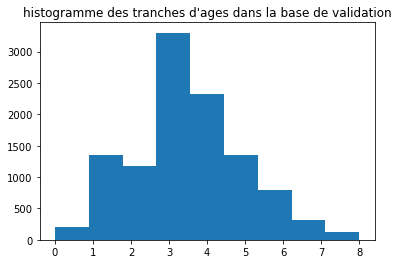

In [5]:
plt.hist(yval, bins = len(dic_ages))
plt.title("histogramme des tranches d'ages dans la base de validation")
plt.show()

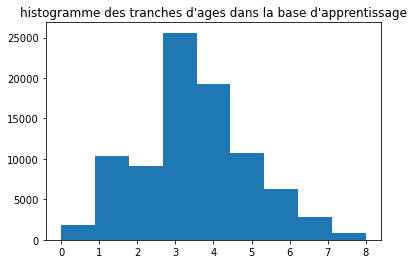

In [6]:
plt.hist(ytrain, bins = len(dic_ages))
plt.title("histogramme des tranches d'ages dans la base d'apprentissage")
plt.show()

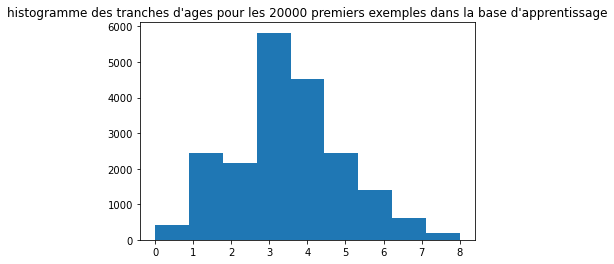

In [7]:
plt.hist(ytrain[:20000], bins = len(dic_ages))
plt.title("histogramme des tranches d'ages pour les 20000 premiers exemples dans la base d'apprentissage")
plt.show()